In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 100000

xs = np.random.uniform(-10,10, (observations, 1))
zs = np.random.uniform(-10,10, (observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1, (observations, 1))

generated_targets = 2*xs -3*zs + 5 + noise

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)

In [3]:
input_size = 2
output_size = 1

In [4]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random_uniform([input_size, output_size],  minval = -0.1, maxval = 0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval = -0.1, maxval = 0.1))

outputs = tf.matmul(inputs, weights) + biases

Instructions for updating:
Colocations handled automatically by placer.


Choosing the objective function and the optimization method

In [5]:
mean_loss = tf.losses.huber_loss(labels = targets, predictions = outputs)

optimize = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss)

Instructions for updating:
Use tf.cast instead.


Prepare for execution

In [6]:
sess = tf.InteractiveSession()

In [7]:
initializer = tf.global_variables_initializer()

In [8]:
sess.run(initializer)

In [9]:
training_data = np.load('TF_intro.npz')

### Learning

In [10]:
for i in range (100):
    _,curr_loss = sess.run([optimize, mean_loss], feed_dict = {inputs:training_data['inputs'], targets : training_data['targets']})
    
    print(curr_loss)

17.661373
16.553305
15.455306
14.369127
13.296965
12.241591
11.206536
10.19664
9.218211
8.279146
7.390026
6.5664725
5.8308463
5.211394
4.736365
4.41943
4.2385774
4.137947
4.0695486
4.0122232
3.959015
3.9075575
3.856932
3.8067396
3.756788
3.7069807
3.6572618
3.6076021
3.557981
3.5083876
3.4588146
3.4092574
3.3597126
3.3101788
3.2606547
3.2111387
3.161633
3.1121354
3.0626469
3.0131688
2.9637012
2.9142454
2.8648026
2.8153732
2.7659593
2.7165625
2.6671832
2.617823
2.5684834
2.5191655
2.4698715
2.4206007
2.3713546
2.3221328
2.2729352
2.22376
2.174609
2.125481
2.076374
2.0272887
1.9782244
1.9291792
1.8801545
1.8311497
1.7821659
1.733204
1.6842656
1.6353528
1.5864705
1.5376222
1.4888154
1.4400599
1.3913691
1.3427622
1.2942716
1.2459493
1.1978948
1.150292
1.103401
1.0574303
1.0125144
0.96873564
0.9261494
0.8848038
0.8447494
0.8060314
0.7686878
0.73274875
0.69823664
0.6651652
0.63353944
0.6033594
0.57461804
0.5473009
0.52138627
0.4968469
0.47365284
0.45176917
0.43115735
0.41177556


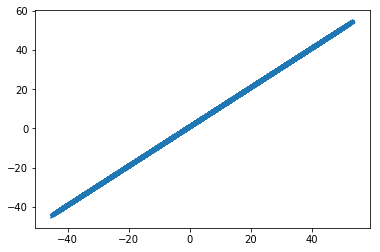

In [11]:
out = sess.run([outputs], feed_dict = {inputs:training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.show()